In [1]:
# Import dependencies
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 100

In [2]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [3]:
# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)

In [4]:
# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 100  # Try values like 100, 200, 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

Epoch: 001, Train Loss: 2.4354299, Test Loss: 2.4755852
Epoch: 002, Train Loss: 3.9236410, Test Loss: 5.1143095
Epoch: 003, Train Loss: 0.5623158, Test Loss: 0.6476966
Epoch: 004, Train Loss: 0.2407783, Test Loss: 0.2889059
Epoch: 005, Train Loss: 0.1428621, Test Loss: 0.1905185
Epoch: 006, Train Loss: 0.0941955, Test Loss: 0.0943288
Epoch: 007, Train Loss: 0.0746617, Test Loss: 0.0724883
Epoch: 008, Train Loss: 0.0617504, Test Loss: 0.0571178
Epoch: 009, Train Loss: 0.0513076, Test Loss: 0.0466694
Epoch: 010, Train Loss: 0.0430132, Test Loss: 0.0386989
Epoch: 011, Train Loss: 0.0365885, Test Loss: 0.0324178
Epoch: 012, Train Loss: 0.0316494, Test Loss: 0.0277373
Epoch: 013, Train Loss: 0.0278367, Test Loss: 0.0241990
Epoch: 014, Train Loss: 0.0248465, Test Loss: 0.0215016
Epoch: 015, Train Loss: 0.0224383, Test Loss: 0.0193680
Epoch: 016, Train Loss: 0.0204374, Test Loss: 0.0176288
Epoch: 017, Train Loss: 0.0187305, Test Loss: 0.0161740
Epoch: 018, Train Loss: 0.0172499, Test Loss: 0.

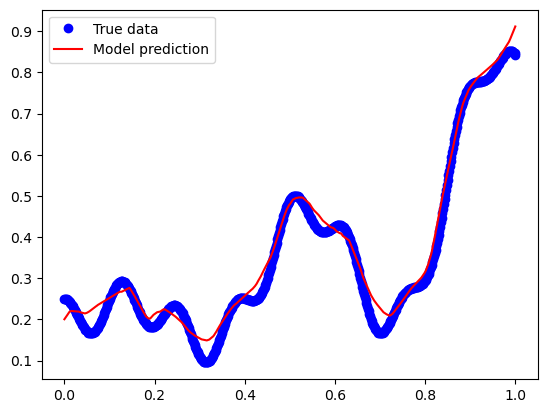

In [6]:
# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 200

Epoch: 001, Train Loss: 2.0267818, Test Loss: 2.1714951
Epoch: 002, Train Loss: 3.1269895, Test Loss: 3.0556849
Epoch: 003, Train Loss: 0.4870037, Test Loss: 0.5017008
Epoch: 004, Train Loss: 0.1158632, Test Loss: 0.1175885
Epoch: 005, Train Loss: 0.0763223, Test Loss: 0.0932067
Epoch: 006, Train Loss: 0.0526999, Test Loss: 0.0570447
Epoch: 007, Train Loss: 0.0422577, Test Loss: 0.0513590
Epoch: 008, Train Loss: 0.0347963, Test Loss: 0.0403812
Epoch: 009, Train Loss: 0.0297586, Test Loss: 0.0346408
Epoch: 010, Train Loss: 0.0259011, Test Loss: 0.0297962
Epoch: 011, Train Loss: 0.0229931, Test Loss: 0.0262312
Epoch: 012, Train Loss: 0.0207413, Test Loss: 0.0234615
Epoch: 013, Train Loss: 0.0189482, Test Loss: 0.0212690
Epoch: 014, Train Loss: 0.0174663, Test Loss: 0.0194782
Epoch: 015, Train Loss: 0.0161937, Test Loss: 0.0179651
Epoch: 016, Train Loss: 0.0150643, Test Loss: 0.0166443
Epoch: 017, Train Loss: 0.0140387, Test Loss: 0.0154675
Epoch: 018, Train Loss: 0.0130912, Test Loss: 0.

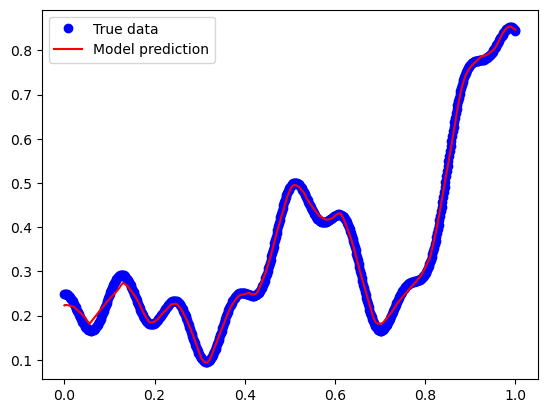

In [7]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 200  # Try values like 100, 200, 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 300

Epoch: 001, Train Loss: 1.6943940, Test Loss: 1.3576902
Epoch: 002, Train Loss: 0.2147134, Test Loss: 0.1538809
Epoch: 003, Train Loss: 0.2042176, Test Loss: 0.3091932
Epoch: 004, Train Loss: 0.0874204, Test Loss: 0.0568524
Epoch: 005, Train Loss: 0.0379086, Test Loss: 0.0642589
Epoch: 006, Train Loss: 0.0275121, Test Loss: 0.0280169
Epoch: 007, Train Loss: 0.0204654, Test Loss: 0.0293006
Epoch: 008, Train Loss: 0.0172203, Test Loss: 0.0208747
Epoch: 009, Train Loss: 0.0140973, Test Loss: 0.0179452
Epoch: 010, Train Loss: 0.0118216, Test Loss: 0.0144192
Epoch: 011, Train Loss: 0.0099079, Test Loss: 0.0119318
Epoch: 012, Train Loss: 0.0083451, Test Loss: 0.0099552
Epoch: 013, Train Loss: 0.0070816, Test Loss: 0.0083374
Epoch: 014, Train Loss: 0.0060404, Test Loss: 0.0070783
Epoch: 015, Train Loss: 0.0051920, Test Loss: 0.0060603
Epoch: 016, Train Loss: 0.0044988, Test Loss: 0.0052423
Epoch: 017, Train Loss: 0.0039305, Test Loss: 0.0045852
Epoch: 018, Train Loss: 0.0034660, Test Loss: 0.

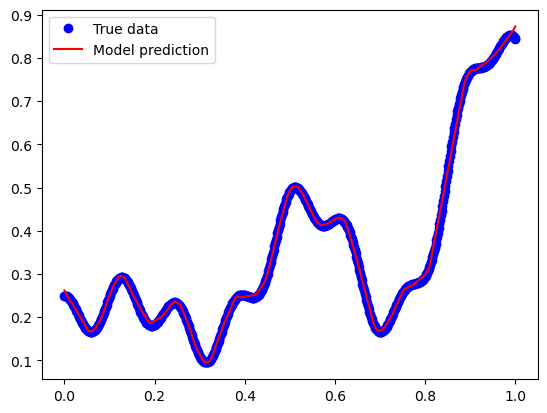

In [8]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 300  # Try values like 100, 200, 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 400

Epoch: 001, Train Loss: 56.2691040, Test Loss: 54.2276945
Epoch: 002, Train Loss: 0.4105022, Test Loss: 0.3816116
Epoch: 003, Train Loss: 2.4412567, Test Loss: 1.9652464
Epoch: 004, Train Loss: 0.3370843, Test Loss: 0.2396506
Epoch: 005, Train Loss: 0.2370436, Test Loss: 0.2311195
Epoch: 006, Train Loss: 0.1464007, Test Loss: 0.1341241
Epoch: 007, Train Loss: 0.1239662, Test Loss: 0.1118252
Epoch: 008, Train Loss: 0.1073626, Test Loss: 0.1034263
Epoch: 009, Train Loss: 0.0966345, Test Loss: 0.0970294
Epoch: 010, Train Loss: 0.0872553, Test Loss: 0.0897591
Epoch: 011, Train Loss: 0.0792265, Test Loss: 0.0830397
Epoch: 012, Train Loss: 0.0721541, Test Loss: 0.0765846
Epoch: 013, Train Loss: 0.0658721, Test Loss: 0.0703609
Epoch: 014, Train Loss: 0.0602676, Test Loss: 0.0646378
Epoch: 015, Train Loss: 0.0552482, Test Loss: 0.0592907
Epoch: 016, Train Loss: 0.0507279, Test Loss: 0.0542920
Epoch: 017, Train Loss: 0.0466342, Test Loss: 0.0497256
Epoch: 018, Train Loss: 0.0429211, Test Loss: 

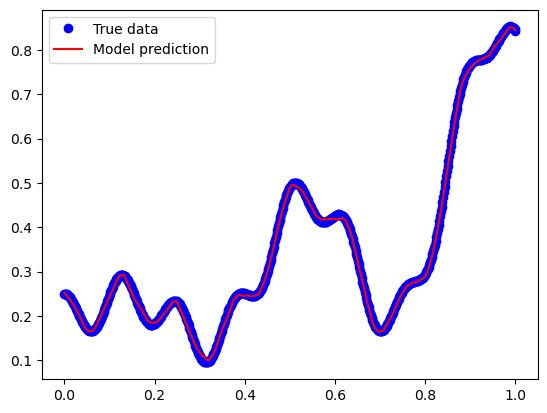

In [9]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 400  # Try values like 100, 200, 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

### Problem 4.2 Determine appropriate mini-batch size = 32, epoch = 500

Epoch: 001, Train Loss: 1.8591078, Test Loss: 1.8779527
Epoch: 002, Train Loss: 3.3536461, Test Loss: 3.5683156
Epoch: 003, Train Loss: 0.6762136, Test Loss: 0.6476456
Epoch: 004, Train Loss: 0.3699355, Test Loss: 0.3676183
Epoch: 005, Train Loss: 0.2734823, Test Loss: 0.3078416
Epoch: 006, Train Loss: 0.2020788, Test Loss: 0.2080572
Epoch: 007, Train Loss: 0.1507670, Test Loss: 0.1631345
Epoch: 008, Train Loss: 0.1131928, Test Loss: 0.1192604
Epoch: 009, Train Loss: 0.0844115, Test Loss: 0.0875499
Epoch: 010, Train Loss: 0.0629654, Test Loss: 0.0637244
Epoch: 011, Train Loss: 0.0472580, Test Loss: 0.0465967
Epoch: 012, Train Loss: 0.0359955, Test Loss: 0.0346528
Epoch: 013, Train Loss: 0.0280716, Test Loss: 0.0263436
Epoch: 014, Train Loss: 0.0225176, Test Loss: 0.0206735
Epoch: 015, Train Loss: 0.0186077, Test Loss: 0.0167733
Epoch: 016, Train Loss: 0.0158094, Test Loss: 0.0140455
Epoch: 017, Train Loss: 0.0137526, Test Loss: 0.0120892
Epoch: 018, Train Loss: 0.0121942, Test Loss: 0.

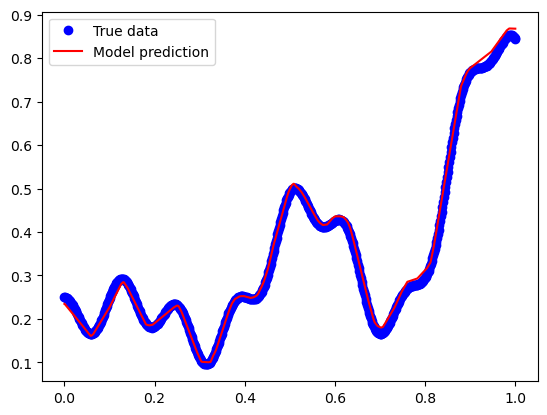

In [13]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

# ################## Part 2: Define Model ##################
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

# ################## Part 3: Define Loss and Optimizer ##################
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ################## Part 4: Training and Testing ##################
def train_NN():
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss = loss / len(loader)
    return loss

# Experiment with different numbers of epochs
N_epoch = 500  # Try values like 100, 200, 500
train_loss = np.zeros((N_epoch, 1))
test_loss = np.zeros((N_epoch, 1))

for epoch in range(N_epoch):
    train_NN()
    train_loss[epoch, 0] = test_NN(train_loader)
    test_loss[epoch, 0] = test_NN(test_loader)
    print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')

# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

Determine appropriate number of epoch = 400